In [51]:
!pip install duckdb

In [52]:
import pandas as pd
import duckdb 
import numpy as np
import matplotlib.pyplot as plt

df_sellers_insight = pd.read_csv('Computed insight - Success of active sellers.csv')
df_products_main = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
df_categories = pd.read_csv('unique-categories.csv')
df_categories_sorted = pd.read_csv('unique-categories.sorted-by-count.csv')

print("--- Products (df_products_main) ---")
df_products_main.info()
print("\n--- Sellers insight (df_sellers_insight) ---")
df_sellers_insight.info()

--- Products (df_products_main) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         1573 non-null   int64  
 1   title                         1573 non-null   object 
 2   title_orig                    1573 non-null   object 
 3   price                         1573 non-null   float64
 4   retail_price                  1573 non-null   int64  
 5   currency_buyer                1573 non-null   object 
 6   units_sold                    1573 non-null   int64  
 7   uses_ad_boosts                1573 non-null   int64  
 8   rating                        1573 non-null   float64
 9   rating_count                  1573 non-null   int64  
 10  rating_five_count             1528 non-null   float64
 11  rating_four_count             1528 non-null   float64
 12  rating_three_count        

### ** Merging the two files to create a single master file for the project **

In [53]:
sql_query_join = """
select p.*,
       s."listedproducts",
       s."totalunitssold" AS merchant_totalunitsold,
       s."averagediscount" AS merchant_averagediscount
FROM 
    df_products_main p
INNER JOIN 
    df_sellers_insight s 
ON
    p.merchant_id = s.merchantid
"""

df_final = duckdb.query(sql_query_join).df()

### ** Data Cleaning **

In [54]:
#number of rows missing in each column
df_final.isnull().sum().sort_values(ascending = False)

merchant_profile_picture        1347
has_urgency_banner              1100
urgency_text                    1100
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
rating_five_count                 45
product_color                     41
origin_country                    17
product_variation_size_id         14
merchant_name                      4
merchant_info_subtitle             1
title                              0
index                              0
rating                             0
uses_ad_boosts                     0
rating_count                       0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
product_variation_inventory        0
tags                               0
badge_product_quality              0
shipping_option_name               0
c

In [55]:
# % of rows missing in each column
round(100*df_final['merchant_profile_picture'].isnull().mean(),2)

np.float64(85.63)

In [56]:
df_final.drop('merchant_profile_picture', axis = 1)

,index,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,...,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month,listedproducts,merchant_totalunitsold,merchant_averagediscount
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,...,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,1,100,-14.0
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,...,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,6,21400,38.0
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,...,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,3,120,88.0
3,3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,...,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,4,11100,7.0
4,4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,...,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08,3,20200,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,...,5b507899ab577736508a0782,0,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08,3,20100,42.0
1569,1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,...,54d83b6b6b8a771e478558de,0,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08,3,5200,92.0
1570,1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,...,5b42da1bf64320209fc8da69,0,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08,1,100,74.0
1571,1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,...,5d56b32c40defd78043d5af9,0,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08,2,200,-18.0


#### **Now we will analyze the discounts. For this purpose, we will introduce the following discount categories:**

#### 1.  **0-10%: Low discount**
#### 2.  **11-25%: Medium discount**
#### 3.  **26-40%: High discount**
#### 4.  **41-100%: Very high discount**

In [57]:
bins_discount = [0, 10, 25, 40, 100] 
labels_discount = ['low', 'medium', 'high', 'very high'] 

df_final['Discount_Segment'] = pd.cut(
    df_final['merchant_averagediscount'], 
    bins=bins_discount, 
    labels=labels_discount, 
    include_lowest=True 
)

print("Segmentation is created:")
print(df_final['Discount_Segment'].value_counts().sort_index())

Segmentation is created:
Discount_Segment
low          212
medium       121
high         133
very high    559
Name: count, dtype: int64


#### Next, we will segment the data by discount level and then compute the average revenue, average rating, and total units sold per segment

In [58]:
# Calculate the metric 'Revenue'
df_final['Revenue'] = df_final['price']* df_final['units_sold']

In [59]:
discount_analysis = df_final.groupby('Discount_Segment', observed = True).agg(
    Average_Revenue = ('Revenue', 'mean'),
    Average_rating = ('rating', 'mean'),
    Total_units_sold = ('units_sold', 'sum')
).sort_values(by = 'Average_Revenue', ascending= False)

print("Analytical Table by Discount Segments:")
print(discount_analysis)

Analytical Table by Discount Segments:
                  Average_Revenue  Average_rating  Total_units_sold
Discount_Segment                                                   
very high            36053.524597        3.841216           2436984
high                 31894.102256        3.803459            561596
medium               25706.433884        3.790579            452863
low                  22845.867925        3.867830            771643


#### Now we'll visualize the data we've gathered

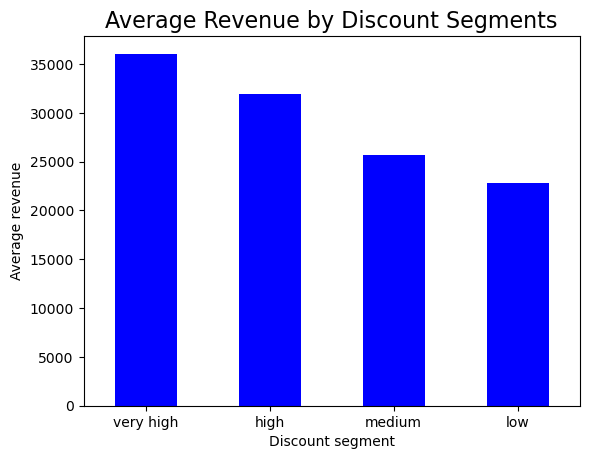

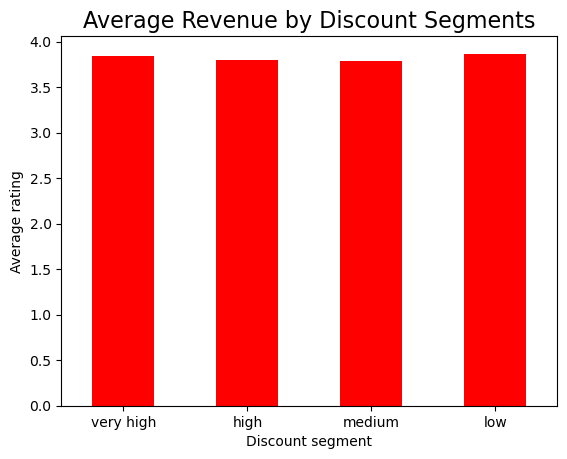

In [60]:
#Average Revenue Visualization
discount_analysis['Average_Revenue'].plot(kind = 'bar', color = 'blue')
plt.title('Average Revenue by Discount Segments', fontsize = 16)
plt.ylabel('Average revenue')
plt.xlabel('Discount segment')
plt.xticks(rotation = 0)
plt.show()


plt.subplots_adjust(hspace=1)


#Visualization of Average Rating
discount_analysis['Average_rating'].plot(kind = 'bar', color = 'red')
plt.title('Average Revenue by Discount Segments', fontsize = 16)
plt.ylabel('Average rating')
plt.xlabel('Discount segment')
plt.xticks(rotation = 0)
plt.show()

### Analysis: Discount Segmentation

The analysis of the relationship between discount segments and product performance metrics (revenue and customer rating) reveals a clear prioritization strategy:

* **Revenue Driver:** The **'very high'** discount segment consistently generates the highest **Average Revenue** per product. This segment delivers the maximum financial return across all observed pricing tiers.
* **Rating Correlation:** The Average Rating remains **stable** across all segments (ranging narrowly between 3.84 and 3.87). This indicates that aggressive pricing does not negatively compromise customer satisfaction.

### Now we're going to test the impact of advertising

In [61]:
ad_boosts_analysis = df_final.groupby('uses_ad_boosts').agg(
    Average_Revenue=('Revenue', 'mean'),
    Average_Rating=('rating', 'mean'),
    Total_Units_Sold=('units_sold', 'sum')).sort_values(by='Average_Revenue', ascending=False)

print("Analysis by Ad Promotion: \n")
print(ad_boosts_analysis)

Analysis by Ad Promotion: 

                Average_Revenue  Average_Rating  Total_Units_Sold
uses_ad_boosts                                                   
0                  35928.009697        3.843139           3987435
1                  34272.924376        3.791762           2837820


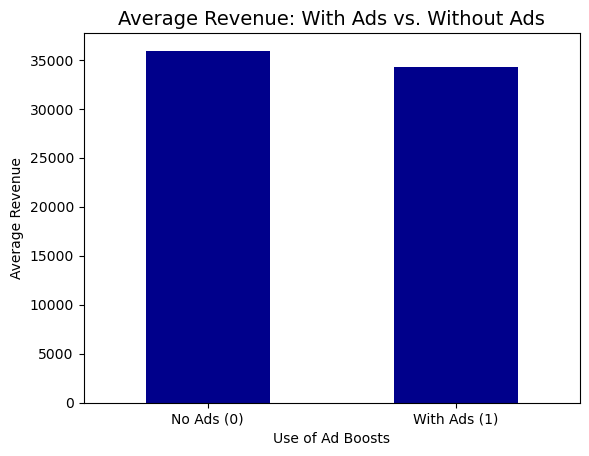

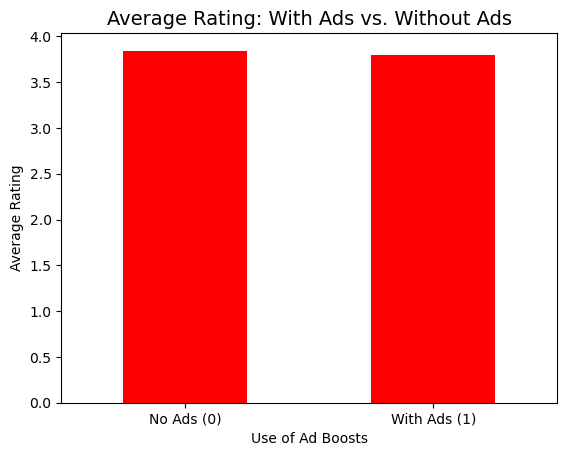

In [62]:
#Visualize Average Revenue
ad_boosts_analysis['Average_Revenue'].plot(kind='bar', color='darkblue')
plt.title('Average Revenue: With Ads vs. Without Ads', fontsize=14)
plt.ylabel('Average Revenue')
plt.xlabel('Use of Ad Boosts')
current_ticks = plt.gca().get_xticks() 
plt.xticks(ticks=current_ticks, rotation=0, labels=['No Ads (0)', 'With Ads (1)']) 
plt.show()

#Visualize Average Rating
ad_boosts_analysis['Average_Rating'].plot(kind='bar', color='red')
plt.title('Average Rating: With Ads vs. Without Ads', fontsize=14)
plt.ylabel('Average Rating')
plt.xlabel('Use of Ad Boosts')
current_ticks = plt.gca().get_xticks() 
plt.xticks(ticks=current_ticks, rotation=0, labels=['No Ads (0)', 'With Ads (1)'])
plt.show()

### Analysis: Ad Promotion Effectiveness

The analysis of the `uses_ad_boosts` feature indicates that the current promotional investment **does not translate into a measurable positive impact on key metrics**:

* **Revenue Performance:** Average Revenue for products **with Ad Boosts** is nearly identical to that of products **without Ad Boosts**.
* **Rating Correlation:** Similarly, Average Rating shows almost **no material difference** between the two groups.

### Now we will look at the influence of the Quality badge, Local Product badge, and Fast Shipping badge.

In [63]:
# Analysis 1: Product Quality Badge
quality_badge_analysis = df_final.groupby('badge_product_quality').agg(
    Average_Revenue=('Revenue', 'mean'),
    Average_Rating=('rating', 'mean'),
    Total_Units_Sold=('units_sold', 'sum')
).sort_values(by='Average_Revenue', ascending=False)
print("1. Analysis by Product Quality Badge:\n", quality_badge_analysis)

# Analysis 2: Local Product Badge
local_badge_analysis = df_final.groupby('badge_local_product').agg(
    Average_Revenue=('Revenue', 'mean'),
    Average_Rating=('rating', 'mean'),
    Total_Units_Sold=('units_sold', 'sum')
).sort_values(by='Average_Revenue', ascending=False)
print("\n2. Analysis by Local Product Badge:\n", local_badge_analysis) 

# Analysis 3: Fast Shipping Badge
shipping_badge_analysis = df_final.groupby('badge_fast_shipping').agg(
    Average_Revenue=('Revenue', 'mean'),
    Average_Rating=('rating', 'mean'),
    Total_Units_Sold=('units_sold', 'sum')
).sort_values(by='Average_Revenue', ascending=False)
print("\n3. Analysis by Fast Shipping Badge:\n", shipping_badge_analysis)

1. Analysis by Product Quality Badge:
                        Average_Revenue  Average_Rating  Total_Units_Sold
badge_product_quality                                                   
1                         56086.709402        4.301368            751600
0                         33533.998043        3.782287           6073655

2. Analysis by Local Product Badge:
                      Average_Revenue  Average_Rating  Total_Units_Sold
badge_local_product                                                   
1                       40412.137931        3.842414            110900
0                       35113.791548        3.820492           6714355

3. Analysis by Fast Shipping Badge:
                      Average_Revenue  Average_Rating  Total_Units_Sold
badge_fast_shipping                                                   
1                       37620.050000        3.760000             85300
0                       35180.454057        3.821681           6739955


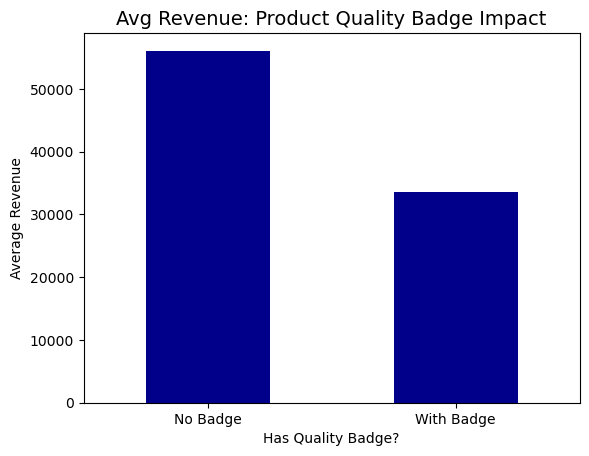

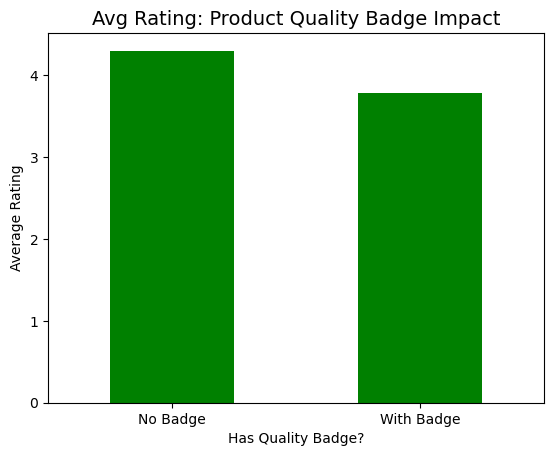

In [64]:
# ------1. Product Quality Badge Visualization -------

#Visualize Average Revenue for Quality Badge
quality_badge_analysis['Average_Revenue'].plot(kind='bar', color='darkblue') 
plt.title('Avg Revenue: Product Quality Badge Impact', fontsize=14)
plt.ylabel('Average Revenue')
plt.xlabel('Has Quality Badge?')
current_ticks = plt.gca().get_xticks()
plt.xticks(ticks=current_ticks, rotation=0, labels=['No Badge', 'With Badge']) 
plt.show()

#Visualize Average Rating for Quality Badge
quality_badge_analysis['Average_Rating'].plot(kind='bar', color='green')
plt.title('Avg Rating: Product Quality Badge Impact', fontsize=14)
plt.ylabel('Average Rating')
plt.xlabel('Has Quality Badge?')
current_ticks = plt.gca().get_xticks()
plt.xticks(ticks=current_ticks, rotation=0, labels=['No Badge', 'With Badge'])
plt.show()

### Analysis: Product Quality Badge Impact

Analysis of the **Product Quality Badge** reveals a counter-intuitive outcome in this specific dataset:

* **Revenue Impact:** Products **without** the Quality Badge show a slightly higher Average Revenue compared to products with the badge.
* **Rating Impact:** Similarly, the Average Rating is marginally higher for products in the **'No Badge'** category.

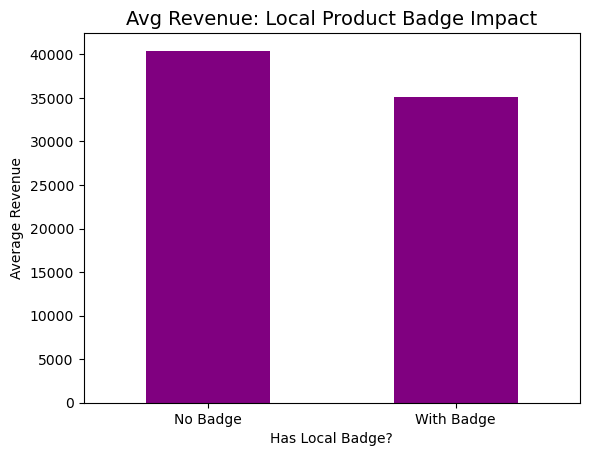

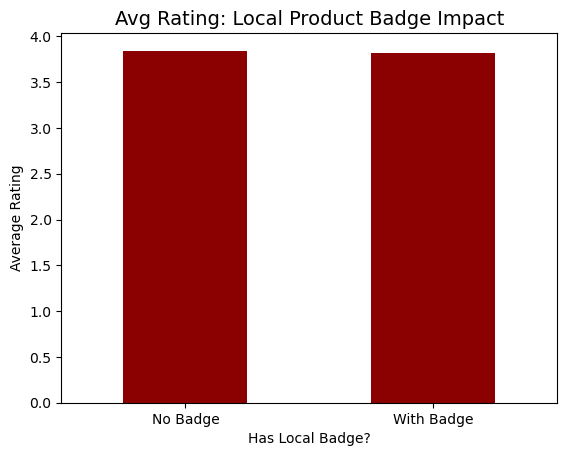

In [65]:
# ------- 2. Local Product Badge Visualization --------

#Visualize Average Revenue for Local Badge
local_badge_analysis['Average_Revenue'].plot(kind='bar', color='purple') 
plt.title('Avg Revenue: Local Product Badge Impact', fontsize=14)
plt.ylabel('Average Revenue')
plt.xlabel('Has Local Badge?')
current_ticks = plt.gca().get_xticks()
plt.xticks(ticks=current_ticks, rotation=0, labels=['No Badge', 'With Badge']) 
plt.show()

#Visualize Average Rating for Local Badge
local_badge_analysis['Average_Rating'].plot(kind='bar', color='darkred')
plt.title('Avg Rating: Local Product Badge Impact', fontsize=14)
plt.ylabel('Average Rating')
plt.xlabel('Has Local Badge?')
current_ticks = plt.gca().get_xticks()
plt.xticks(ticks=current_ticks, rotation=0, labels=['No Badge', 'With Badge'])
plt.show()

### Analysis: Local Product Badge Impact

The analysis of the **Local Product Badge** showed the same unexpected result as the Quality Badge:**:

* **Revenue Impact:** Products **without** the Local Badge show a higher Average Revenue compared to products with the badge.
* **Rating Impact:** The Average Rating is also marginally higher for products in the **'No Badge'** category.

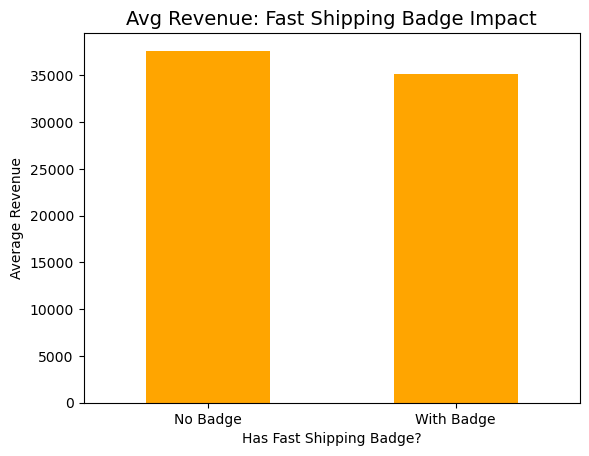

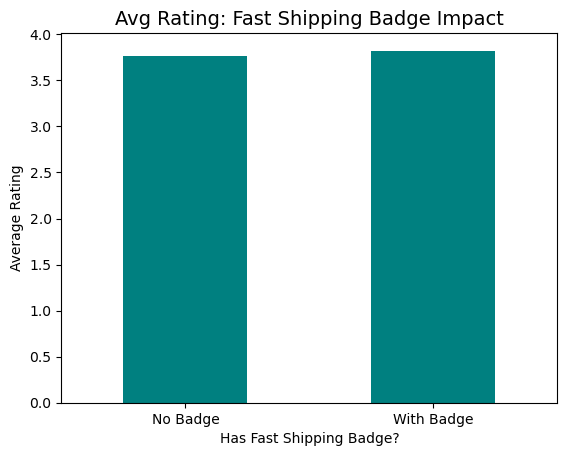

In [66]:
# ------- 3. Fast Shipping Badge Visualization --------

#Visualize Average Revenue for Shipping Badge
shipping_badge_analysis['Average_Revenue'].plot(kind='bar', color='orange') 
plt.title('Avg Revenue: Fast Shipping Badge Impact', fontsize=14)
plt.ylabel('Average Revenue')
plt.xlabel('Has Fast Shipping Badge?')
current_ticks = plt.gca().get_xticks()
plt.xticks(ticks=current_ticks, rotation=0, labels=['No Badge', 'With Badge']) 
plt.show()

#Visualize Average Rating for Shipping Badge
shipping_badge_analysis['Average_Rating'].plot(kind='bar', color='teal')
plt.title('Avg Rating: Fast Shipping Badge Impact', fontsize=14)
plt.ylabel('Average Rating')
plt.xlabel('Has Fast Shipping Badge?')
current_ticks = plt.gca().get_xticks()
plt.xticks(ticks=current_ticks, rotation=0, labels=['No Badge', 'With Badge'])
plt.show()

### Analysis: Fast Shipping Badge Impact

The analysis of the **Fast Shipping Badge** marks the **third consecutive result that goes against expectations**:

* **Revenue Impact:** Products **without** the Fast Shipping Badge show a slightly higher Average Revenue compared to products with the badge.
* **Rating Impact:** Average Rating is almost **identical** between the two categories, with no measurable positive effect from the badge.

# FINAL STRATEGIC SUMMARY

<h3 style="color:#008000; border-bottom: 3px solid #008000; padding-bottom: 5px;">
    Actionable Strategy: Two Core Directives
</h3>

The analysis identifies two primary directives for optimizing e-commerce performance:

---

### 1. Deep Discounts

* The **'very high'** discount segment generated the **highest Average Revenue**, proving to be the primary financial growth driver. This aggressive pricing strategy did not negatively affect customer rating.
* **Recommendation:** Prioritize leveraging the **deepest discounts** to maximize financial returns.

### 2.RE-EVALUATE NON-PERFORMING INVESTMENTS

* Paid promotion (Ad Boosts) and all three Product Badges (Quality, Local, Shipping) showed **no measurable positive impact** on Average Revenue or Rating.
* **Recommendation:** Re-evaluate and **reduce the budget allocated to Ad Boosts** and investigate the technical implementation of all **Product Badges**.